Naive bayes is a classification algorithm based on Naive Bayes theorem, which assumes that features are conditionally
independent given the class label. Despite this naive assumption, it performs exceptionally well in many real-world problems, particularly in text classification. It works on probabilty of each class given the input and choosing the 
class with the highest probability.

In the following dataset we're going to use Naive bayes ML algorithm to find out whether a person has diabetes or not
based on glucose and blood pressure levels

Step 1 - Load the dataset

In [1]:
import pandas as pd

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#Read the csv file

df = pd.read_csv('Naive-Bayes-Classification-Data.csv')

#Dispay the first 5 rows
print("First 5 rows of the dataset:")
print(df.head().to_markdown(index=False,numalign='left',stralign='left'))

#print the columns names and their data types
print("\nColumn information:")
print(df.info())

#print the descriptive statistical details of the dataset
print("\nDescriptive statistics:")
print(df.describe().to_markdown(index=False,numalign='left',stralign='left'))


First 5 rows of the dataset:
| glucose   | bloodpressure   | diabetes   |
|:----------|:----------------|:-----------|
| 40        | 85              | 0          |
| 40        | 92              | 0          |
| 45        | 63              | 1          |
| 45        | 80              | 0          |
| 40        | 73              | 1          |

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None

Descriptive statistics:
| glucose   | bloodpressure   | diabetes   |
|:----------|:----------------|:-----------|
| 995       | 995             | 995        |
| 44.3065   | 79.1849         | 0.500503   |
| 6.70757   | 9.3402          | 0.500251   |
| 20        | 50           

Step 2 - Data Visualisations and preprocessing 

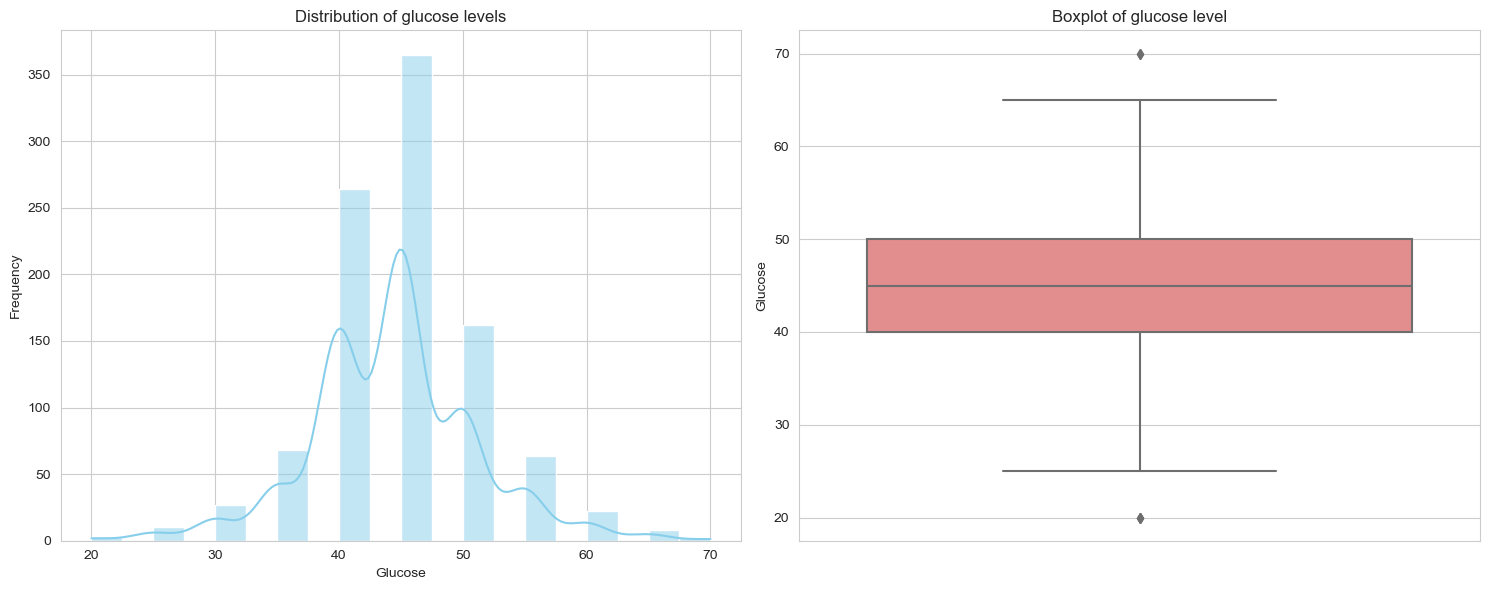

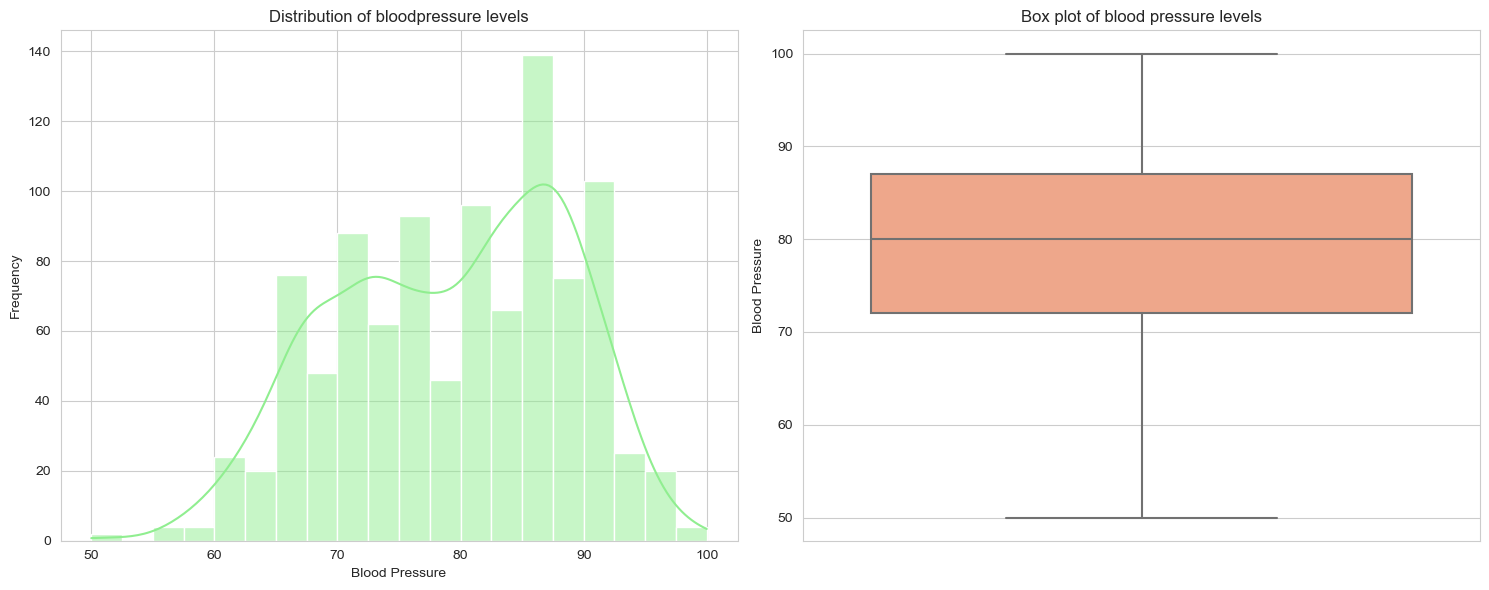

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#let's us visualise the features Blood pressure and glocose to detect any outliers, identitfy patterns, data spread and 
#central tendency

#We now set the stye for plot
sns.set_style('whitegrid')

#create a figure and a set of subplots
plt.figure(figsize=(15,6))

#Histogram for glucose
plt.subplot(1,2,1)
sns.histplot(df['glucose'],kde=True,bins=20,color='Skyblue')
plt.title('Distribution of glucose levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')


#Boxplot for glucose
plt.subplot(1,2,2)
sns.boxplot(y=df['glucose'],color='lightcoral')
plt.title('Boxplot of glucose level')
plt.ylabel('Glucose')

plt.tight_layout()
plt.show()

#Let's create a figure and set of subplots for blood pressure
plt.figure(figsize=(15,6))

#Histogram for bloodpressure
plt.subplot(1,2,1)
sns.histplot(df['bloodpressure'],kde=True,bins=20,color='lightgreen')
plt.title('Distribution of bloodpressure levels')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

#Boxplot for blood pressure
plt.subplot(1,2,2)
sns.boxplot(y=df['bloodpressure'],color='lightsalmon')
plt.title('Box plot of blood pressure levels')
plt.ylabel('Blood Pressure')


plt.tight_layout()
plt.show()

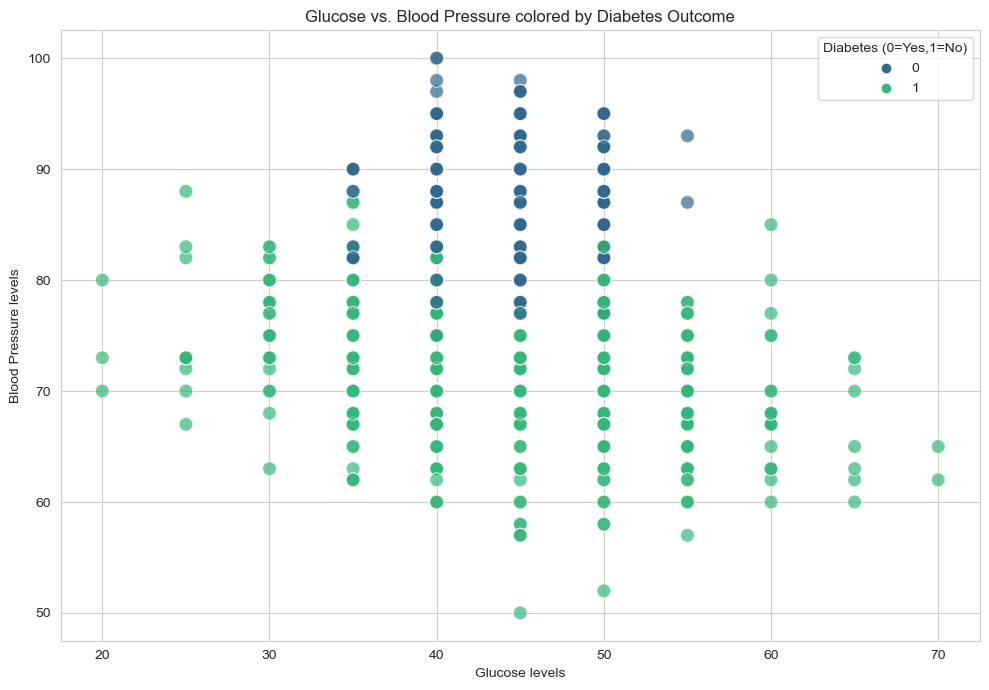

In [10]:
#Now lets also make a scatter plot to further understand insights on the dataset such as seperation, overlap, feauture importance

import matplotlib.pyplot as plt
import seaborn as sns

#Whitegrid style would be better visual

sns.set_style('whitegrid')

#Now let's create a scatterplot of glucose vs blood pressure, colored by diabetes

plt.figure(figsize=(10,7))
sns.scatterplot(x='glucose',y='bloodpressure',hue='diabetes',data=df, palette='viridis', s=100,alpha=0.7)
plt.title('Glucose vs. Blood Pressure colored by Diabetes Outcome')
plt.xlabel('Glucose levels')
plt.ylabel('Blood Pressure levels')
plt.legend(title='Diabetes (0=Yes,1=No)')
plt.grid(True)
plt.tight_layout()
plt.show()

#In the below scatter plot we can see that there are multiple overlaps between people with and without diabetes, indicating
#that a classification model would help us. It also helps visualise the seperation which further confirms that
#People with diabetes(blue dots) tend to fall under higher glucose and bloodpressure values
#While people without diabetes(green dots) tend to fall nder the bottom left indicating lower levels of glucose and
#blood pressure values.

Step 3 Let's prepare the data for modelling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#let's define the features target y and features x

X = df[['glucose','bloodpressure']]
y = df['diabetes']

#Now let's split the data for training and testing

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#Initialise standardscaler

scaler = StandardScaler()

#Let's mow fit the scaler on both training and testing data pf features

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Display a few scaled samples

print("\nFirst 5 rows of X_train (original):")
print(X_train.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of X_train (scaled):")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of X_test (original):")
print(X_test.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of X_test (scaled):")
print(pd.DataFrame(X_test_scaled, columns=X.columns).head().to_markdown(index=False, numalign="left", stralign="left"))



X_train shape: (796, 2)
X_test shape: (199, 2)
y_train shape: (796,)
y_test shape: (199,)

First 5 rows of X_train (original):
| glucose   | bloodpressure   |
|:----------|:----------------|
| 40        | 68              |
| 40        | 65              |
| 35        | 73              |
| 50        | 87              |
| 55        | 60              |

First 5 rows of X_train (scaled):
| glucose   | bloodpressure   |
|:----------|:----------------|
| -0.651207 | -1.1986         |
| -0.651207 | -1.52085        |
| -1.41463  | -0.66151        |
| 0.875629  | 0.842338        |
| 1.63905   | -2.05794        |

First 5 rows of X_test (original):
| glucose   | bloodpressure   |
|:----------|:----------------|
| 45        | 87              |
| 55        | 67              |
| 45        | 82              |
| 45        | 90              |
| 55        | 63              |

First 5 rows of X_test (scaled):
| glucose   | bloodpressure   |
|:----------|:----------------|
| 0.0723992 | 0.816733        |


Model Accuracy:0.9095

Confusion Matrix:
[[91  8]
 [10 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        99
           1       0.92      0.90      0.91       100

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



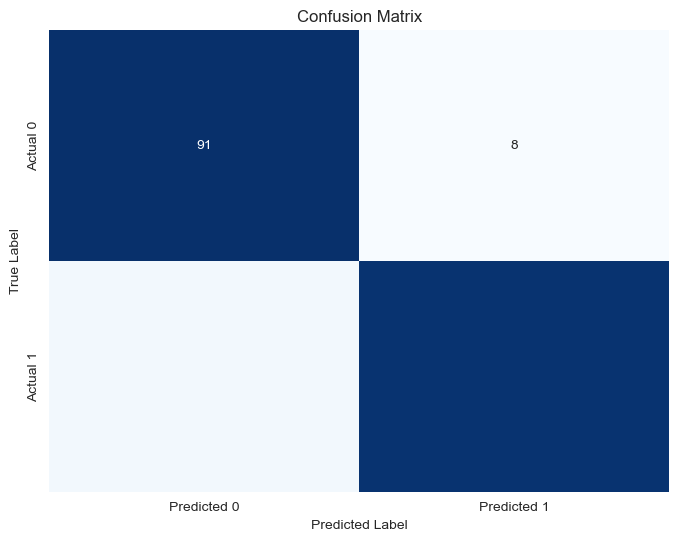

In [21]:
#Step 4 - Model training and evaluation

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Let us now intialise the Gaussian Naive bayes classifier
model = GaussianNB()

#Let's now train the model on the scaled training data
model.fit(X_train_scaled,y_train)

#Let's now make prediction
y_pred = model.predict(X_test_scaled)

#Evaluate the model

accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f"Model Accuracy:{accuracy:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The analysis successfully developed and evaluated a Gaussian Naive Bayes classification model that can predict diabetes 
based on glucose and blood pressure levels with high accuracy of 91%. 
The model's performance metrics suggest it is a reliable tool for this prediction task, 
fulfilling the objective set at the beginning of the analysis.